Dataset shape: (1482, 20)


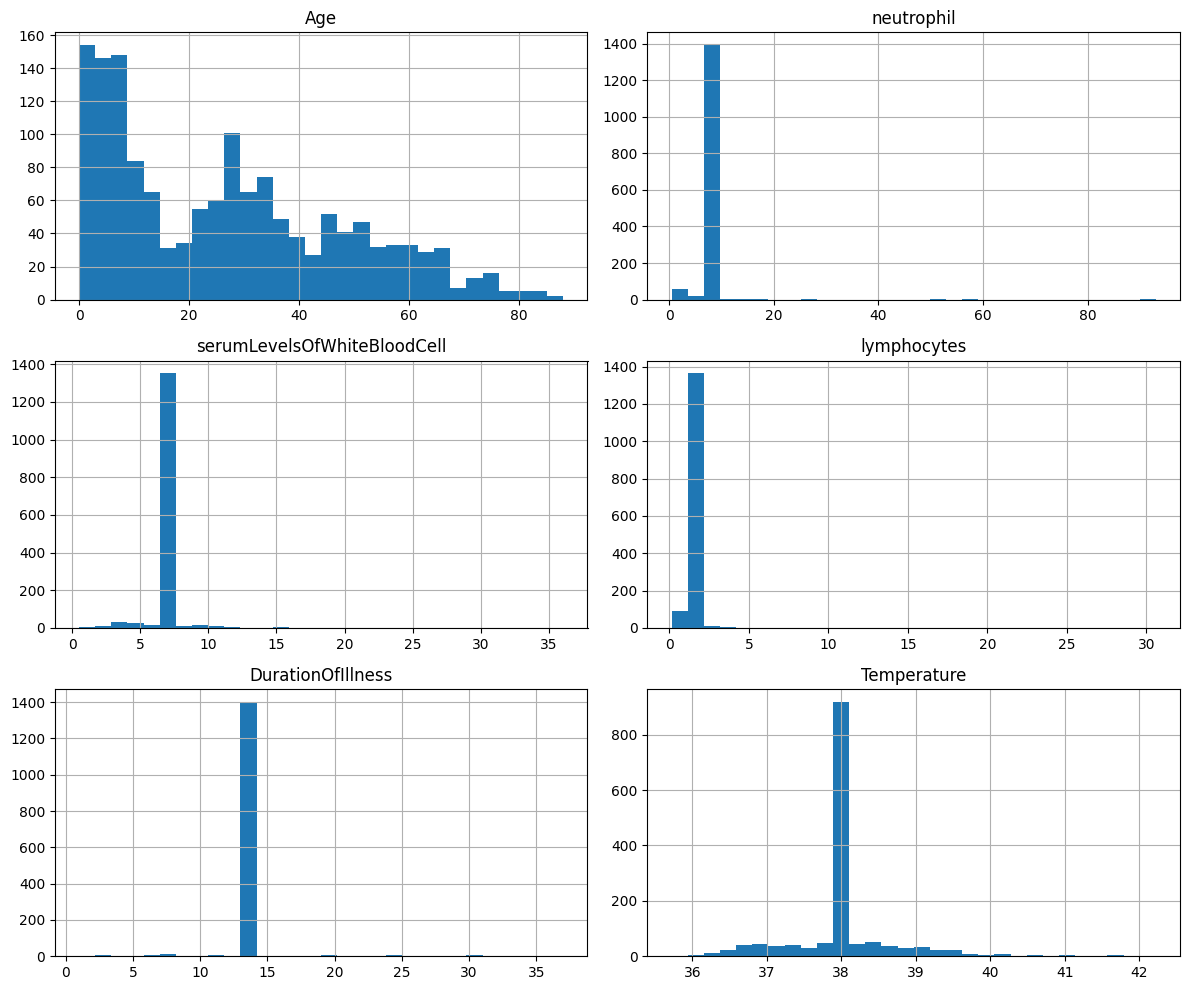

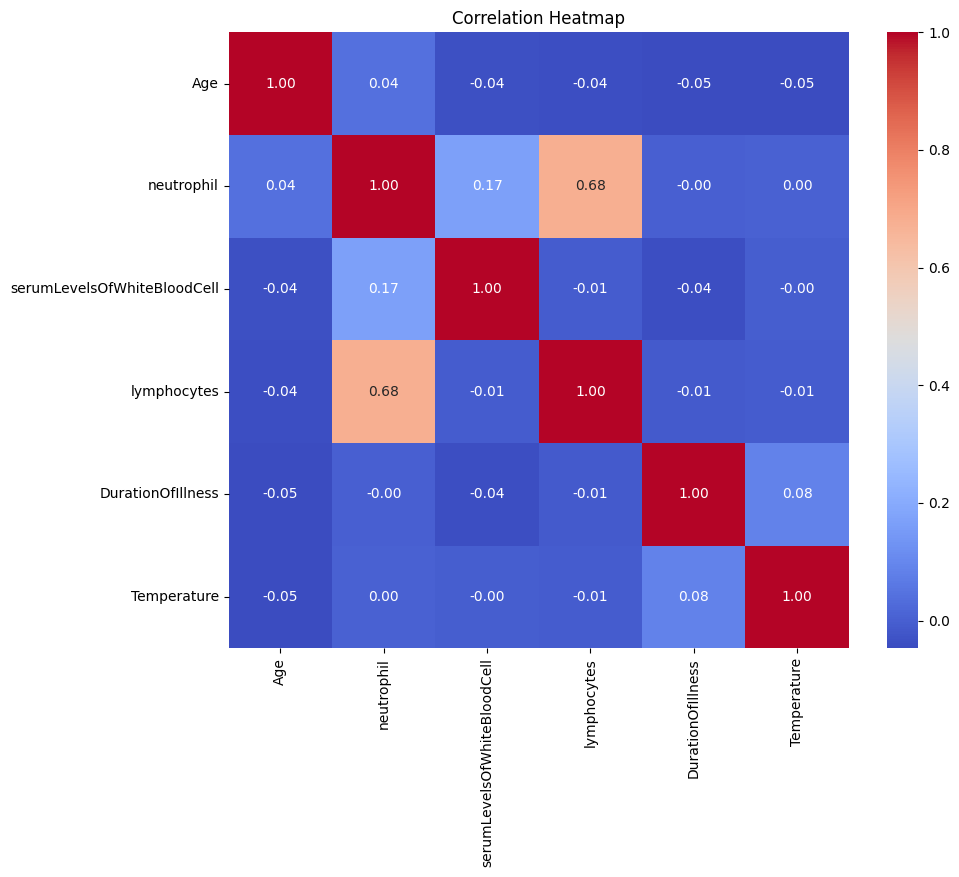

Accuracy: 0.9057
Precision: 0.9120
Recall: 0.9885
F1-Score: 0.9487
AUC: 0.8208


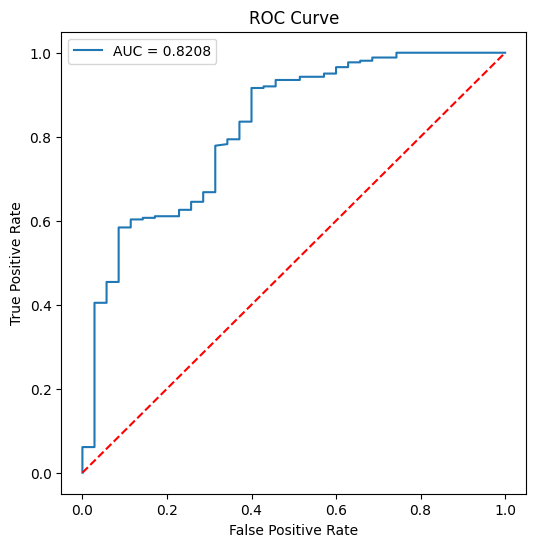

In [ ]:
# ======================
# 📌 LIBRARY IMPORT
# ======================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

# ======================
# 📌 DOWNLOAD FILE
# ======================
url_flu = 'https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/04.%20Week%204/Datasets/flu.csv'
urllib.request.urlretrieve(url_flu, '/content/flu.csv')

# ======================
# 📌 LOAD DATA
# ======================
df = pd.read_csv('/content/flu.csv')
print(f"Dataset shape: {df.shape}")
df.head()

# ======================
# 📌 FEATURE ENGINEERING
# ======================
# Pisahkan numerik dan kategorikal
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Isi missing value
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

# Encoding kategorikal
df_encoded = pd.get_dummies(df, drop_first=True)

# ======================
# 📌 SPLIT DATA
# ======================
X = df_encoded.drop(columns=df_encoded.columns[-1])  # asumsikan target di kolom terakhir
y = df_encoded[df_encoded.columns[-1]]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# ======================
# 📌 EDA & VISUALIZATION
# ======================
# Histogram numerik
df[num_cols].hist(figsize=(12,10), bins=30)
plt.tight_layout()
plt.show()

# Korelasi heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ======================
# 📌 MODELING
# ======================
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_val_scaled)
y_pred_prob = model.predict_proba(X_val_scaled)[:,1]

# ======================
# 📌 EVALUATION
# ======================
acc = accuracy_score(y_val, y_pred)
prec = precision_score(y_val, y_pred)
rec = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
auc = roc_auc_score(y_val, y_pred_prob)

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


1️⃣ Akurasi
Akurasi adalah proporsi prediksi benar dari seluruh data.
Rumus:
Akurasi = (TP + TN) / (TP + TN + FP + FN)

2️⃣ Presisi
Presisi adalah proporsi prediksi positif yang benar.
Rumus:
Presisi = TP / (TP + FP)

3️⃣ Recall
Recall adalah proporsi kasus positif yang berhasil dikenali model.
Rumus:
Recall = TP / (TP + FN)

4️⃣ F1-Score
F1-Score adalah rata-rata harmonis antara presisi dan recall.
Rumus:
F1 = 2 * (Presisi * Recall) / (Presisi + Recall)

5️⃣ AUC (Area Under Curve)
AUC adalah luas area di bawah kurva ROC. Nilainya makin mendekati 1, makin baik modelnya.

6️⃣ ROC Curve
ROC Curve menunjukkan hubungan antara True Positive Rate (TPR) dan False Positive Rate (FPR).
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

💡 TP: True Positive
💡 TN: True Negative
💡 FP: False Positive
💡 FN: False Negative